# 다중 분류 - 아이리스 품종 분류

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# X data는 정규화
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(iris.data)
X_scaled.shape

(150, 4)

In [ ]:
# Y data는 One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target)
Y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
Y_onehot.shape

(150, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_onehot, stratify=Y_onehot, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

- 모델 정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0
)

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2711 - accuracy: 0.8947


[0.2711194157600403, 0.8947368264198303]

- 모델 저장/로드

In [ ]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [ ]:
model.save('model/iris.h5')

In [ ]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris.h5')

In [ ]:
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8947


[0.2711194157600403, 0.8947368264198303]

- 학습과정 시각화

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_accuracy']
xs = np.arange(1,len(y_acc)+1)

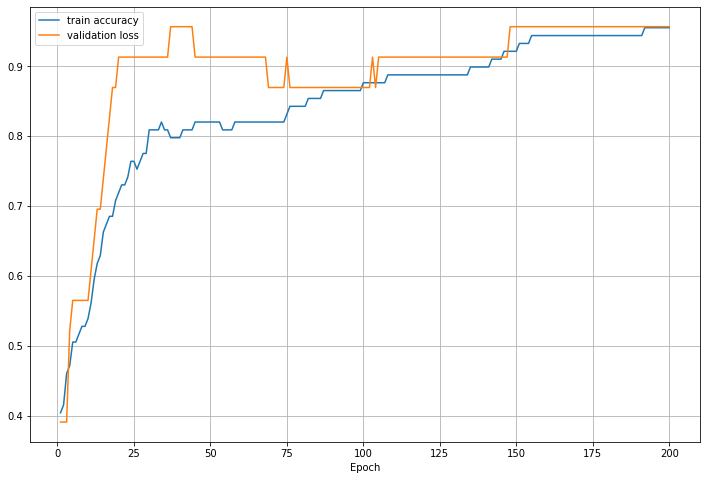

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [ ]:
model2 = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history2 = model2.fit(
    X_train, Y_train, validation_split=0.2, epochs=500, batch_size=50, verbose=0
)

In [ ]:
model2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1508 - accuracy: 0.9211


[0.15084300935268402, 0.9210526347160339]

In [ ]:
y_acc = history2.history['accuracy']
y_vloss = history2.history['accuracy']
xs = np.arange(1,len(y_acc)+1)

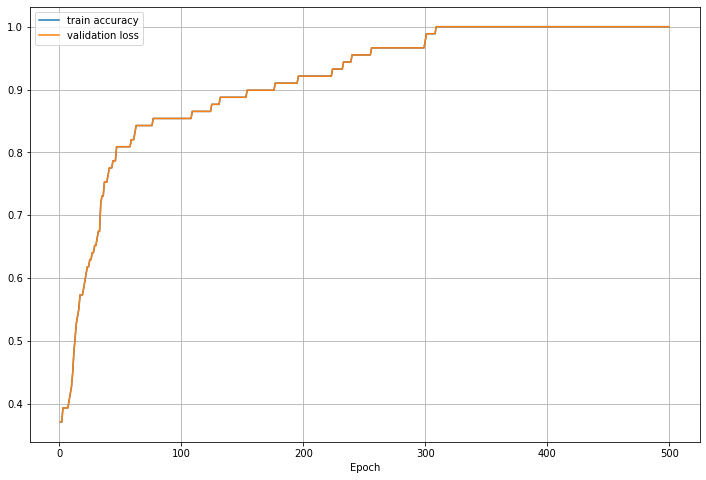

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [ ]:
del model2